In [25]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from numpy import zeros

In [26]:
# goat = 0, car = 1

def random_door (N):
    door = np.zeros(N,dtype=int) # generate array full of zeros (=goat)
    car = np.random.randint(0,N) # generate random index
    door[car] = 1                # assign 1 (=car) to the random entry of the array 
    return door

## $N$ = 3 doors

In [44]:
N = 3 #total number of doors
d = np.linspace(0,2,N,dtype=int) # array that contains the doors indexes ([0,1,2])
cycles = 5000 #number of cycles 

switch = []   # choices of the player that changes his choice
confirm = []  # choices of the player that confirms his choice
new = []      # choices of the new player

In [45]:
#g1 = choice of the switcher
#g2 = choice of the confirmer
#g3 = choice of the new player

for i in range(cycles):
    door = random_door(N)        # generate the doors vector
    g1 = np.random.randint(0,N)  # g1 = random choice between 0,1,2
    host = np.delete(d,g1)       # possible choices for the host (all but g1)
    
    # check what's behind the remaining doors
    # the host opens the one with the goat
    # g1 chooses the other one
    # g3 chooses one of the doors that the host hasn't opened
    if door[host[0]]==0:
        g1 = host[1]
        host = host[0]
        g3 = np.delete(d,host)[np.random.randint(0,len(d)-1)]
    else:
        g1 = host[0]
        host = host[1]
        g3 = np.delete(d,host)[np.random.randint(0,len(d)-1)] 

    # g2 chooses one of the three initial doors and sticks with it
    g2 = np.random.randint(0,N)
    
    switch.append(door[g1])
    confirm.append(door[g2])
    new.append(door[g3])

switch = np.array(switch)
confirm = np.array(confirm)
new = np.array(new)

In [46]:
print('Probabilities of winning:')
print('Switcher: ', len(switch[switch==1])/len(switch))
print('Confirmer: ', len(confirm[confirm==1])/len(confirm))
print('New player: ', len(new[new==1])/len(new))

Probabilities of winning:
Switcher:  0.659
Confirmer:  0.3248
New player:  0.504


## Generalization to $N$ doors and $p$ doors opened by the host

Same procedure: now the host opens $p$ doors, so the host's choice will be a vector of dimension $p$.

In [47]:
def p_g1 (N,p,cycles): # probability of winning for the switcher
    d = np.arange(0,N,1,dtype=int)
    switch = [] 
        
    for i in range(cycles):
        door = random_door(N) 
        g1 = np.random.randint(0,N)
        remaining_doors = np.delete(d,g1)  # possible choices for the host
        host = [] 
        
        for j in range(p):
            # choose randomly one of the remaining doors
            h = remaining_doors[np.random.randint(0,len(remaining_doors))]
            # generate a new choice if door[h] has a goat or has already been chosen
            while door[h]==1 or h in host:
                h = remaining_doors[np.random.randint(0,len(remaining_doors))]
            host.append(h)

        host = np.array(host)
        g1 = np.delete(d,np.concatenate((np.array([g1]),host)))[np.random.randint(len(d)-1-len(host))] 
        switch.append(door[g1])

    switch = np.array(switch)
    p_switch = len(switch[switch==1])/len(switch)  

    return p_switch

def p_g2 (N,p,cycles): # probability of winning for the confirmer
    d = np.arange(0,N,1,dtype=int) 
    confirm = [] 

    for i in range(cycles):
        door = random_door(N) 
        g2 = np.random.randint(0,N) 
        confirm.append(door[g2])
    
    confirm = np.array(confirm)
    p_confirm = len(confirm[confirm==1])/len(confirm)

    return p_confirm

def p_g3 (N,p,cycles):  # probability of winning for the new player
    d = np.arange(0,N,1,dtype=int)
    new = []
    
    for i in range(cycles):
        door = random_door(N) 
        g1 = np.random.randint(0,N) 
        remaining_doors = np.delete(d,g1)  
        host = [] 
        
        for j in range(p):
            # choose randomly one of the remaining doors
            h = remaining_doors[np.random.randint(0,len(remaining_doors))]
            # generate a new choice if door[h] has a goat or has already been chosen
            while door[h]==1 or h in host:
                h = remaining_doors[np.random.randint(0,len(remaining_doors))] 
            host.append(h)

        host = np.array(host)
        g3 = np.delete(d,host)[np.random.randint(len(d)-len(host))] 
        new.append(door[g3])
    
    new = np.array(new)

    p_new = len(new[new==1])/len(new)

    return p_new


First, I fix $p=1$ and see how the probability of winning changes as a function of $N$ for each player.

In [48]:
N = np.arange(3,16,1,dtype=int) # total number of doors
p_switch = []
p_confirm = []
p_new = []
for i in N:
    p_switch.append(p_g1(i,1,cycles))
    p_confirm.append(p_g2(i,1,cycles))
    p_new.append(p_g3(i,1,cycles))

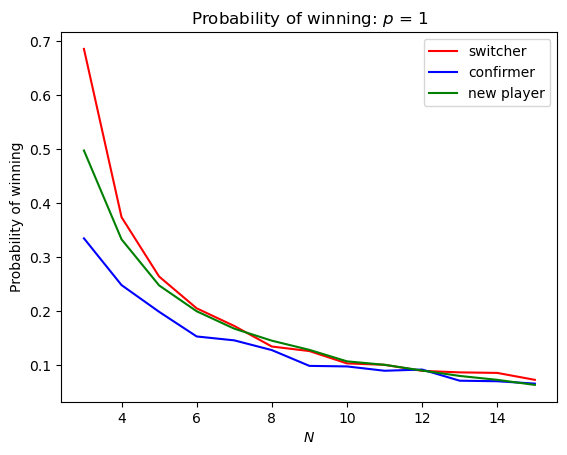

In [49]:
plt.plot(N,p_switch,c='r',label='switcher')
plt.plot(N,p_confirm,c='b',label='confirmer')
plt.plot(N,p_new,c='g',label='new player')
plt.title('Probability of winning: $p$ = 1')
plt.xlabel('$N$')
plt.ylabel('Probability of winning')
plt.legend()
plt.show()

I see that the probability of winning for each player decreases as the number of total doors increases.

Now let's fix $N$ and see what happens as $p$ changes. Let's start from the switcher.

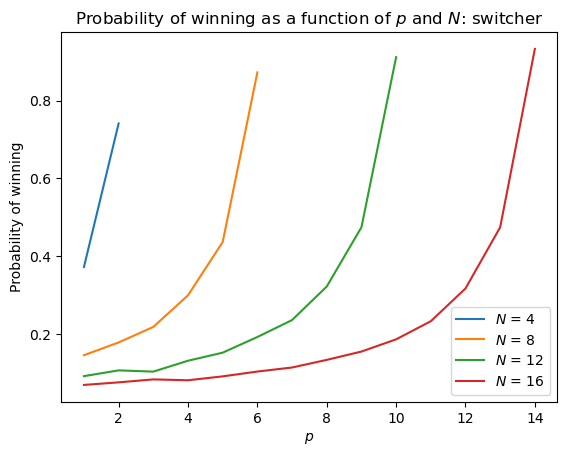

In [56]:
N = np.arange(4,20,4,dtype=int) 
for i in N:
    p_switch = []
    p = np.arange(1,i-1,1)  # p: between 1 and N-2
    for j in p:
        p_switch.append(p_g1(i,j,cycles))
    plt.plot(p,p_switch,label='$N$ = '+str(i))
plt.legend()
plt.title('Probability of winning as a function of $p$ and $N$: switcher')
plt.xlabel('$p$')
plt.ylabel('Probability of winning')
plt.legend()
plt.show()

As one would expect, the probability of winning increaeses with $p$ and it is maximum when $p=N-2$

Let's look at the confirmer.

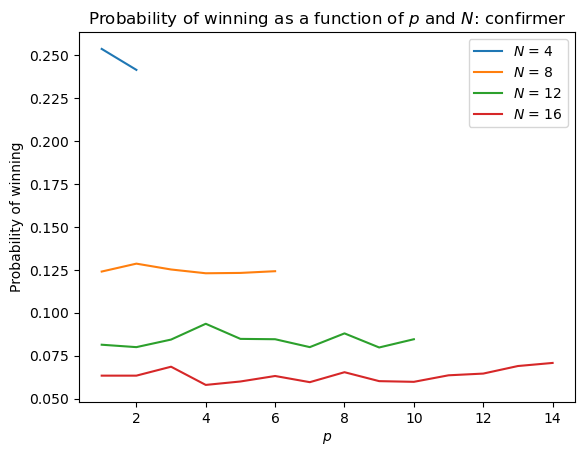

In [57]:
N = np.arange(4,20,4,dtype=int)
for i in N:
    p_confirm = []
    p = np.arange(1,i-1,1)
    for j in p:
        p_confirm.append(p_g2(i,j,cycles))
    plt.plot(p,p_confirm,label='$N$ = '+str(i))
plt.legend()
plt.title('Probability of winning as a function of $p$ and $N$: confirmer')
plt.xlabel('$p$')
plt.ylabel('Probability of winning')
plt.legend()
plt.show()

As one would expect, the probability of winning is constant as a function of $p$: the confirmer isn't influenced by the host's choice(s).

Finally, let's look at the new player.

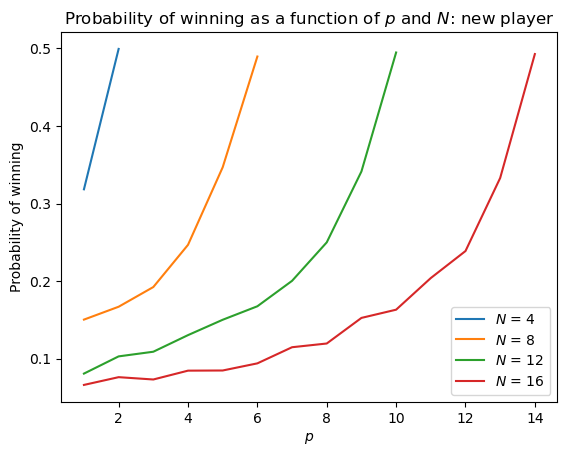

In [54]:
N = np.arange(4,20,4,dtype=int)
for i in N:
    p_new = []
    p = np.arange(1,i-1,1)
    for j in p:
        p_new.append(p_g3(i,j,cycles))
    plt.plot(p,p_new,label='$N$ = '+str(i))
plt.legend()
plt.title('Probability of winning as a function of $p$ and $N$: new player')
plt.xlabel('$p$')
plt.ylabel('Probability of winning')
plt.legend()
plt.show()

Again, the probability of wiining increases with $p$ and it's maximum (and equal to 0.5) when $p=N-2$